In [1]:
# %matplotlib inline

In [2]:
import numpy as np
import math
import pygame
import matplotlib.pyplot as plt
from body import Body
from gravity_animation import *
from plots import *

pygame 2.4.0 (SDL 2.26.4, Python 3.9.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


# <center>Project: Non-simultaneous gravitational interaction<center> 
## <center>Abstract<center>
$\quad$According to modern physical theories, the interaction between physical objects such as bodies, elementary particles, etc., is governed by four fundamental types of interactions: [electromagnetic](https://en.wikipedia.org/wiki/Electromagnetism), [strong nuclear](https://en.wikipedia.org/wiki/Nuclear_force), [weak nuclear](https://en.wikipedia.org/wiki/Weak_interaction), and [gravitational](https://en.wikipedia.org/wiki/Gravity). These interactions are described as physical fields and are mediated by the exchange of special (virtual) particles. Historically, the first sufficiently systematic and well-studied interaction was gravitational, and Sir Isaac Newton deserves credit for that. The formula he derived provides a description of the interaction between two bodies with certain masses and at a specific distance from each other. However, this formula implicitly includes a very important assumption: gravitational interaction occurs instantaneously.

$\quad$In the late 19th century, [Michelson and Morley](https://www.sciencefacts.net/michelson-morley-experiment.html) experimentally established that the speed of light is the same regardless of the direction in which it moves. At the beginning of the 20th century, this unexpected property of light formed the basis of [Einstein's Special Theory of Relativity](http://physics.mq.edu.au/~jcresser/Phys378/LectureNotes/SpecialRelativityNotes.pdf) as one of its two fundamental postulates: the speed of light in a vacuum is a constant and has the same value in all inertial reference frames. In modern understanding, the speed of light is the ultimate limit of the speed at which a physical object could move (more precisely, a physical object whose rest mass is zero). It is not possible to transmit any information at a faster speed. This automatically means that the four fundamental interactions should also occur with a finite speed: the time interval between the emission of the virtual particle and its absorption by another particle must be nonzero. Although no particle carrying the gravitational interaction has been discovered so far, it is also expected to occur with a time delay.

$\quad$On [September 14, 2015](https://www.ligo.caltech.edu/news/ligo20160211?highlight=September%2014,%202015), the [Laser Interferometer Gravitational-Wave Observatory (LIGO)](https://www.ligo.caltech.edu/page/about) experiment detected gravitational waves, as predicted by the [General Theory of Relativity](https://www.cambridgescholars.com/resources/pdfs/978-1-5275-4428-4-sample.pdf) in 1916. The object GW150914, which was detected, represents a system of two black holes located at a distance of approximately 1.3 billion light-years from Earth. The merging of the two black holes causes deformations in the geometry of spacetime, i.e., gravitational waves, which travel through the cosmic space and reach Earth after 1.3 billion years. The LIGO experiment confirms the finite speed of propagation of gravitational interaction.

This project aims to accomplish the following tasks:
 *  Тo calculate the motion of a system of two or more bodies that interact gravitationally in both the simultaneous and non-simultaneous interaction modes, and to depict their motion in animation;
 *  To compare the two modes of interaction and to demonstrate the difference between them (if such a difference exists).
    
<br><br>
### <center>*Part One*<center>
## <center>Physical Explanation<center>

$\quad$Currently, there are two theories of gravity that have been sufficiently scientifically tested: Newton's theory of gravity (NTG) and Einstein's General Theory of Relativity (GTR). Although GTR is the more accurate theory, NTG remains sufficiently accurate for calculating gravitational interactions in physical systems involving moving objects with relatively low speeds and weak gravitational fields. There is also another significant difference between the two theories - NTG considers space, time, and matter as independent physical quantities and the motions of objects under gravitational forces as non-inertial. In contrast, GTR views space, time, and matter as deeply interconnected and mutually influencing physical quantities, and the motion of objects in gravitational fields as inertial. In GTR, gravity is not regarded as a force but as the curvature of the geometry of spacetime caused by the presence of massive bodies in a given volume of space. Since there is no force acting, according to the First Law of Mechanics, the motion of an object should be inertial. The deviation of the object's trajectory is a result of it following a so-called geodesic curve - the shortest path between two points in space.

$\quad$In this project, gravitational interactions will be calculated from the Newtonian perspective using the well-known formula for gravitational interaction between two bodies:
    
    
$$\vec{F} = G\frac{m_1m_2}{r^2},\quad\quad\quad\quad(1)$$       
    
    
where:
 * F is the force of attraction between the two interacting objects,
 * G is the gravitational constant, approximately equal to 6.675×10⁻¹¹ m³/(kg·s²),
 * m1 is the mass of one object,
 * m2 is the mass of the other object,
 * r is the distance between the centers of mass of the two objects. 
 

Let's now replace $m_1$ with M and $m_2$ with $m$:
    
$$\vec{F} = G\frac{Mm}{r^2},\quad\quad\quad\quad(2)$$
    
where $M$ is the mass of the body creating the gravitational field, and $m$ is the mass of the body located in that gravitational field and experiencing the acceleration created by the field at that point. 
    
$\quad$**Important clarification!!! In this project, the capital $M$ does not imply that the mass $M$ is greater than the lowercase $m$. It signifies that the mass $M$ is responsible for creating the gravitational field in which the body with mass $m$ is located. This principle underlies the fundamental concept in this project and will be further explained below.**
    
When an object is located in the gravitational field of another object, the force acting on it is given by another well-known formula of Newton:
    
$$\vec{F} = m\vec{a},\quad\quad\quad\quad(3)$$
    
In this case, we need to replace the acceleration $a$ with the gravitational acceleration $g$.
    
$$\vec{F} = m\vec{g},\quad\quad\quad\quad(4)$$

Since the forces are equal, we can substitute (4) into (2) and obtain:
    
$$m\vec{g} = G\frac{Mm}{r^2},\quad\quad\quad\quad(5)$$ 
    
$\quad$We simplify both sides of the equation by dividing by $m$ and obtain the formula for the magnitude and direction of the gravitational acceleration generated by a body with mass $M$ at a distance $r$:
    
$$\vec{g} = -G\frac{M}{r^2},\quad\quad\quad\quad(6)$$  
    
From the formula, it can be seen that the magnitude of the acceleration does not depend on the mass of the attracted body (in this case $m$). The minus sign indicates the direction of the force toward the body that creates the gravitational field.
    
$\quad$The same logic should be valid regarding the first body with mass $M$, which is located in the gravitational field of $m$. It experiences an acceleration created by the gravitational field of $m$, and its magnitude and direction will be:
    
$$\vec{g} = -G\frac{m}{r^2},\quad\quad\quad\quad(7)$$
    
$\quad$Here, the fundamental concept in this project needs to be introduced - the gravitational signal. The "gravitational signal" is not the hypothetical particle carrying the gravitational interaction - the **graviton**. The "gravitational signal" is simply a term that describes the transmission of specific information through space (and time). More specifically, the information it carries pertains to two things - the current location of the body at the time it is emitted and the mass of the body from which it is emitted. When body $A$ "absorbs" a gravitational signal emitted by body $B$, it simply means that body $A$ is subjected to an acceleration, with a magnitude and direction contained as information within the gravitational signal. 
    

$\quad$The next key concept in this project is that once emitted, the signal is **independent** of its source and propagates spherically and uniformly in all directions. The reverse would not be possible because the "gravitational signal" travels at the maximum possible speed, regardless of the form of communication with its source. Therefore, any form of communication with the source would need to occur at a speed greater than the maximum possible speed. 
        
$\quad$The acceleration acting on the body is expressed by the change in its instantaneous velocity through the computation of the first derivative of this acceleration. Since $M$ and $G$ are constants, we can assume:
    
$$a = MG,\quad\quad\quad\quad(9)$$
    
Then equation (6) will have the more general form:
    
$$\vec{g} = -\frac{a}{r^2},\quad\quad\quad\quad(10)$$
    
or
    
$$\vec{g} = -ar^{-2}.\quad\quad\quad\quad(11)$$
    

To find the instantaneous velocity, we need to integrate (11) with respect to r:
    
    
$$\vec{v} = \int-ar^{-2}dr,\quad\quad\quad\quad(12)$$
    
    
$$\vec{v} = -a\int r^{-2}dr,\quad\quad\quad\quad(13)$$
    
    
$$\vec{v} = -a \frac{(-2)r^{-1}}{-2},\quad\quad\quad\quad(14)$$
    
or 
  
$$\vec{v} = -\frac{a}{r}\quad\quad\quad\quad(15)$$
    

Substituting the value of $a$ from equation (9), we obtain:
    
$$\vec{v} = -\frac{MG}{r}.\quad\quad\quad\quad(16)$$
    
$\quad$This is the equation for the instantaneous velocity created by the gravitational acceleration, which will be used in the code below. 
    
    
    
$\quad$Let's now focus on the 'mechanics' of gravitational signals. The following two graphs illustrate the difference in the effect of the gravitational field in the cases of **simultaneous** and **non-simultaneous** interaction.
    

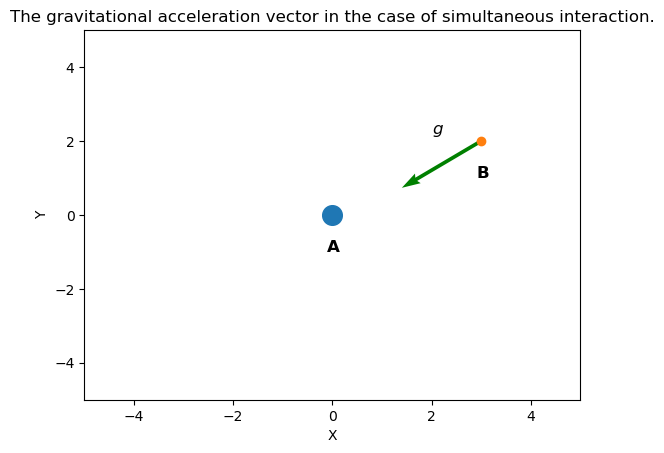

In [3]:
plot_simultaneous_vector_of_acceleration()

$\quad$In the upper graph, body $A$ exerts a gravitational force of attraction on body $B$, whose vector is directed from the center of body $B$ towards the center of body $A$ in the **current** position of body $A$. Let's see what happens to the vector of gravitational acceleration $\vec{g}$ in the case of **non-simultaneous** interaction.

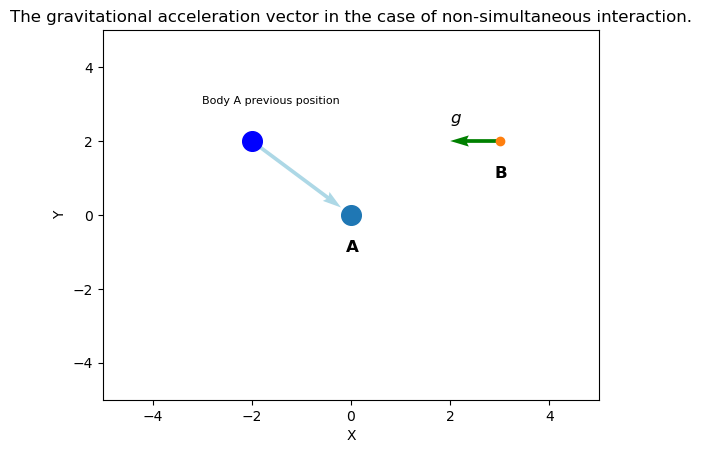

In [4]:
plot_non_simultaneous_vector_of_acceleration()

$\quad$As can be seen, the vector of acceleration is not directed towards the current position of body $A$, but towards the position from which the signal was emitted - body $A$ previous position. **This is the key idea of this project.** This changes both the **direction** and **magnitude** of the vector, as the distance between body $B$ and the point from which the signal was emitted is greater compared to the previous graph. The next animations will provide a better visual explanation of the **non-simulataneous** gravitational interaction.

In [3]:
# Run the animation
еxplanatory_animation1()

$\quad$For greater clarity, this animation considers the case where only one body - the blue body - emits a gravitational signal, while the other body - the orange body - receives the signal. When the signal reaches the orange body, its gravitational acceleration modifies its instantaneous velocity - which in this case is zero, and it starts moving towards the blue body.

The second animation depicts the 'real' scenario where both objects emit and receive signals while in motion.

In [6]:
# Run the animation
еxplanatory_animation2()

<br><br><center><em><strong>Conclusion</strong></em></center>

$\quad$The difference between **simultaneous** and **non-simultaneous gravitational** interaction lies in the idea that in **non-simultaneous interaction**, objects interact not with their **current** states but with their **past** states. This key difference reveals certain issues that impose a completely different approach when calculating the interactions between them. The next part of the presentation deals with these theoretical problems and the challenges of their implementation.


<br><br>
### <center>*Part Two*<center>
## <center>Mechanics of non-simultaneous gravitational interaction and its implementation<center>

$\quad$When considering the problem of **non-simultaneous** gravitational interaction and its visualization, the first and main issue that arises is the problem of **_time_**. Since animation essentially consists of a sequence of frames changing over a specific time interval, it is evident that simulating it one-to-one with the reality as we know it on a macroscopic level - where we have a continuous flow of time and continuous trajectories of objects' motion - is not possible. **It is not possible to create an animation with an infinite number of frames per second.** This limitation also imposes the problem of representing continuous processes in time and space through discrete values. Essentially, it involves the problem of **continuity-discontinuity**, which is primarily addressed in **_mathematical analysis_**.
    
$\quad$Taking this into account, the way time and space are measured in this project will not be tied to the real flow of time and real values of distances in space. Instead, they will be based on the fundamental units provided by the computer screen, specifically the **Pygame** library. The unit of motion in **_time_** will be the **_frame_**, and the corresponding unit of motion in **_space_** will be the **_pixel_**. Accordingly, the velocities of objects will be specified in terms of **_pixels per frame_**. This approach aims to avoid unnecessary time measurements in microseconds using Python's **time module**, unnecessary distance measurements in centimeters, inches, etc., and the corresponding conversions of these measurements to pixels and frames.
    
$\quad$Firstly, the coordinate system in Pygame has a specific characteristic that needs to be taken into consideration - its origin is located at the top left of the screen. The values along the x-axis increase to the left, while the values along the y-axis increase downwards. This necessitates recalculating the positions of objects to be computed, typically done in a **_Cartesian coordinate system_** with the origin at point $(0,0)$. The point $(0,0)$ will be positioned at the center of the screen, regardless of the chosen width and height values.

$\quad$Another issue is that the y-coordinate values increase from top to bottom, instead of the reverse, which can lead to problems when calculating slopes. This problem is solved in the **animation()** function in the **gravity_animation** module.   
    
$\quad$Let an object move with a velocity $v_{x} = 5$ _pixels/frame_ along the x-axis. In each subsequent frame, the object jumps 5 pixels relative to its position in the previous frame. What happens to the trajectory of the object between frames?    

$\quad$Actually, it cannot be precisely determined. In some cases, when jumping from point to point, the trajectory may be a straight line, while in others, it may be curved. When the animation visualizes simultaneous interactions, the position of the object between frames is not a problem because it interacts with other bodies at the same moment. In this case, the animation simply represents a sequence of instantaneous snapshots of the continuous trajectories of the objects. Similarly, we can consider the continuous function $y = x^2$ only for discrete values of $x$: for $x = [1, 2, 3, 4]$, we have $y = [1, 4, 9, 16]$. What happens between these values does not alter the overall picture. 
    
$\quad$However, it is different in the case when signals travel from point to point, and it is crucial for the accuracy of the calculations to know precisely where the signal is "absorbed". Small deviations at the beginning can lead to significant deviations as time progresses.
    
$\quad$**The problem of the intersection point between the signal and the trajectory of the object is the most significant issue in this project, and it will be discussed in details below.**
    
$\quad$The "discrete nature" of the animation leads to a precisely defined approach regarding how the bodies "emit" gravitational signals. Following the logical path, the bodies should emit gravitational signals at every moment, i.e. in every frame from their current position in that same frame. There is no basis for emitting signals in one frame and not in the next. Additionally, since there is uncertainty about the position of the bodies between frames due to the reasons described above, there should not be signal emission between them.
    
The graph below provides a visual representation of the intersection problem.

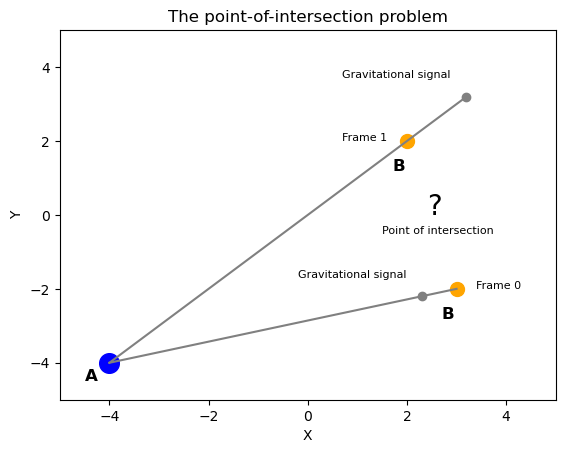

In [23]:
intersection_problem_plot()

$\quad$Body $B$ moves within the gravitational field of body $A$, changing its position from frame $0$ to frame $1$. In frame $0$, the gravitational signal traveling from $A$ to $B$ is at a certain distance from $B$. In frame $1$, the gravitational signal is already behind $B$. The straight lines connecting the signals to their source - body $A$ - represent the trajectory of the signal. It is evident that the signal has reached body $B$ between the two frames. The question is, what is the exact position where this occurred? At first glance, it seems that the point should be located where the lines connecting the two positions of the body and the signal intersect. However, that is not the case. The next animation will show this.

In [7]:
signal_trajectory_animation()

The trajectory of the signal is not a straight line.

$\quad$**Important clarification!** The gray point on the gravitational signal in the animation above is simply the localization of where the signal will intersect with the path of the 
body. In reality, the signal does not travel along the curved line but is "spread" throughout the length of the front and travels together with its extension in time, i.e., along the expanding circle. However, at the moment of contact, the body receives this signal at a precisely defined point. Since the gravitational signal, similar to light, travels along the shortest distance between two points, i.e. in a straight line, precisely that straight line - between the point of contact and the point from which the signal was emitted - will be used to calculate the magnitude of the acceleration that the signal will "impart" to the body.

The trajectory of the signal is actually a spiral. The equation is parametric and has the following format in terms of components:

$$x(t) = vtcos(\theta),\quad\quad\quad\quad(17)$$


$$y(t) = vtsin(\theta),\quad\quad\quad\quad(18)$$

where:
 * **_v_** is the speed of the gravitational signal,
 * **_t_** is the time,
 * **_$\theta$_** is the angle of slope of the body's trajectory between two frames.
 
 
Angle **_$\theta$_** has the following equation:

$$\theta(t) = arctan(m),\quad\quad\quad\quad(19)$$

where **_m_**  is the slope of the trajectory of the moving body (not the body that emits the signal) between the reception of two consecutive signals.

$\quad$Here arises the question why the trajectory of the body between the signals should be a straight line? The answer is that between the signals, the body does not experience any acceleration, and therefore, according to the [First Law of Mechanics](https://en.wikipedia.org/wiki/Newton's_laws_of_motion), it should move in a straight line.

$\quad$And so, the equation of the trajectory of the body as a function of time is given by the following expression:

$$y(t) = mx(t) + c,\quad\quad\quad\quad(20)$$

where **_c_** is a constant.

$\quad$Therefore, to find the intersection point of the signal and the trajectory of the object, we need to solve the following system of equations, composed of equations (15), (16) and (18).

$$\left\{
\begin{array}{@{}l@{}}
x_{signal}(t) = vtcos(\theta) \\
y_{signal}(t) = vtsin(\theta) \\
y_{body}(t) = mx_{body}(t) + c \\
\end{array}
\right.\quad\quad\quad\quad(21)$$

$\quad$This system, however, does not have an analytical solution due to the presence of periodic functions such as $sin$ and $cos$. To find the intersection point in such a case, a numerical method should be used, such as the [Newton's method](https://math.libretexts.org/Bookshelves/Calculus/Calculus_(OpenStax)/04%3A_Applications_of_Derivatives/4.09%3A_Newtons_Method), [secant method](https://math.libretexts.org/Bookshelves/Calculus/CLP-1_Differential_Calculus_(Feldman_Rechnitzer_and_Yeager)/06%3A_Appendix/6.03%3A_C-_Root_Finding/6.3.04%3A_C.4_The_secant_method), or another iterative approach. However, using a numerical method will slow down the execution of the animation. Therefore, an analytical solution is preferable. Such a solution is still possible if we take into account the fact that the actual speed of signal propagation is significantly greater than the speed of the bodies. The following animation demonstrates what happens to the trajectory of the signal as the signal speed increases.

In [8]:
expanding_spiral_animation()

$\quad$The animation shows two things: first, as the signal's speed increases, the curve of the spiral trajectory gets closer and closer to a straight line; and second, the intersection point moves towards an earlier and earlier moment on the body's trajectory. As the signal speed approaches infinity, the non-simultaneous gravitational interaction increasingly approaches simultaneity, as described by Newton's formula.

$\quad$Therefore, in order to achieve faster animation performance, it is justified to compute the intersection point analytically as the intersection of two linear functions. Then, the system of equations for the intersection point will have the following form:

$$\left\{
\begin{array}{@{}l@{}}
y_{signal} = nx_{signal} + b \\
y_{body} = mx_{body} + c \\
\end{array}
\right.\quad\quad\quad\quad(22)$$

where:
 * **_n_** is the slope of the signal trajectory,
 * **_b_** is a constant,
 * **_m_** is the slope of the body trajectory,
 * **_c_** is a constant.
 

An interesting question arises here. Although it goes beyond the scope of this project, the question is whether the lack of an analytical solution even for two bodies implies that there is no analytical solution to this problem in the real world? 

Let's keep this question open and focus on the issues related to implementing the concept of non-simultaneous gravitational interaction.

<br><br><center><em><strong>Class Body</strong></em></center>

$\quad$Since one of the main goals of this project is to create a simulation of interacting objects, the chosen approach for implementation is through **object-oriented programming**. It is convenient to store the necessary information for the participating bodies - which are essentially the same - in separate instances of a corresponding class. This is the **_Body_** class, located in the file **body.py**. The simulation itself is carried out using the **_Pygame_** library and is located in the **animation()** function in the file **animation_gravity.py**.

$\quad$The necessary information for each interacting body is contained in the __init__() method of the class. These include: 
 * the initial position of the body - the components of the position along the x-axis and y-axis, 
 * the mass of the body, 
 * the radius, 
 * the color, 
 * the initial velocity vector - which will be updated on each frame as a result of the body's interaction with other bodies,
 * 'fictional' position - the virtual position of the body between frames, where it interacts with the gravitational signals of other bodies, and which will be "transformed" into the actual position of the body after all interactions with the other bodies have been computed,
 * the history of positions - the positions from which the body emits gravitational signals, which will be sequentially used by the other bodies to calculate the magnitude and direction of the acceleration with which the specific signal acts upon them.
 
$\quad$The gravitational constant $G$ is defined as a class attribute to have the same value for all instances. For the purposes of the simulation, it can be set to either its real value or to a freely chosen value.

$\quad$The speed of the signal (**_signal_speed_**), i.e., the maximum allowed speed of movement, is also defined as a class attribute and can be adjusted as desired.

$\quad$A significant part of the logic of non-simultaneous interaction is contained in the **_position_history_** attribute. It represents a two-dimensional list, where each element contains four values: 
 * at indices $0$ and $1$ - information about the position of the body from which the gravitational signal is emitted;
 * at index $2$ - an one-dimensional list which contains information about the specific bodies (objects) that have already interacted with this particular signal. This list serves two purposes: the first is that when all participating bodies have interacted with the signal (i.e., when its length is equal to the number of participating bodies minus 1), the corresponding element of the list is deleted to lighten the execution of the animation. The second purpose is to maintain the sequence of signal receptions by the bodies — they interact strictly sequentially with the signals emitted by other bodies (from the earliest emitted signals to the later ones). Here, the principle is valid that every signal must be received by all bodies: **no one can hide from gravity!**
 * at index $3$ - the time when the signal was emitted, i.e. the frame number when this occurs.
 
$\quad$Since the second goal of this project is to make a comparison between the two types of interaction, it is necessary to implement code for the case of **simultaneous interaction** as well. The choice for this is set in the **animation()** function through the parameter **simultaneous_interaction =** **_True_** (whose default value is **_False_**). The calculations for simultaneous interaction are straightforward: 
 1. In the **_calc_new_positions_** method, a for loop iterates through each participating body, and for each body, a second for loop iterates through the other bodies,
 2. the distances between the bodies in the current frame are obtained, 
 3. the magnitude and direction of the gravitational acceleration are calculated, 
 4. the instantaneous velocity (first derivative) that this acceleration imparts on the body is calculated,
 5. this instantaneous velocity is added to the current velocity of the body through vector addition,
 6. when all the accelerations and instantaneous velocities are calculated, the final state of the current velocity for each body is stored in the 'velocity' attribute,
 7. finally, the positions of the bodies are updated by vector addition with their modified current velocities - тhis occurs in the **animation()** function.
 
The vector calculations take place in the **_vectors_calculations_** method. This method is also used for vector calculations in the case of non-simultaneous interaction.

**Important clarification!** The order of iteration through the bodies in the case of simultaneous interactions does not matter because vector addition is commutative:

$$\vec{B} + \vec{A} = \vec{A} + \vec{B},\quad\quad\quad\quad(23)$$

**Another important clarification!** The instantaneous velocity, as derived in equation $(16)$, has a negative sign, indicating that the force creating this acceleration is an attractive force directed towards the attracting body. However, here the instantaneous velocity is taken with a positive sign in the **_integrate_acceleration_** method because the direction of acceleration and instantaneous velocity are already determined in the **_dist_vector_** variable. This variable represents the distance vector between the bodies and contains information about its direction, which is towards the body generating the gravitational field. The three vectors are **collinear** (as they have the same direction), and based on this fact, it is straightforward to calculate the instantaneous velocity created by the gravitational acceleration as a coefficient multiplied by the distance vector. This coefficient represents the first derivative of acceleration.

$\quad$With this, the calculations for **simultaneous interaction** are completed. Let's now turn our attention to the other case. In this case, before we proceed to vector calculations, the following factors need to be considered:
 1. While iterating through the bodies in the nested for loop of the **_calc_new_positions_** method, the first step is to check if the respective body has already interacted with the signal - whether it appears at index $2$ in the **_position_history_** attribute, 
 2. if it has interacted, the next signal is checked. When a signal is found with which it has **not** interacted, the next position of the body is calculated by adding the velocity vector and the **fictional_position** attribute of the body,
 3. then, the next position of the current signal is checked, and the distance between the next signal's position and the next body's position is calculated,
 4. if it is greater than the speed of the signal for one frame, the same calculations are performed for the previous positions of the body and the previous position of the signal.

Once we have the correct pair of positions - (**current positions - next positions**) or (**previous positions - current positions**), we proceed to calculate the intersection point between them:
 1. First, we need to calculate the slopes - for that, we require the exact coordinates of the body and the signal at the two consecutive moments. Let's visualize the situation again.

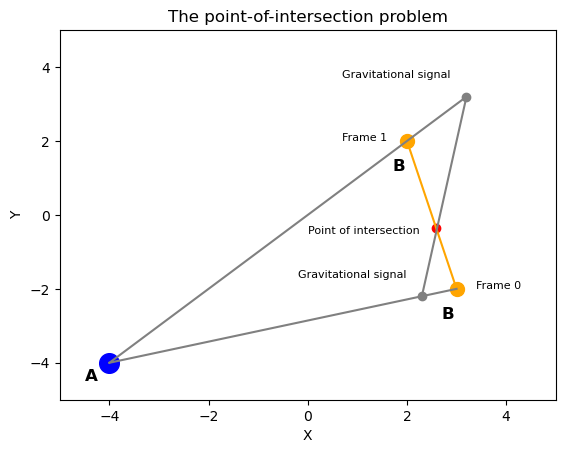

In [10]:
intersection_problem_plot(question_mark=False)

 2. We have the coordinates of the body at both moments, but we don't have the coordinates of the signal - we find them using the method **_find_signal_coordinates_**. The positions of the signal are calculated based on the positions of the moving body (Body $B$ in the upper graph), the emitting body (Body $A$), and the speed of the signal.
In this method, different cases are distinguished when the slope of the body's positions is horizontal, vertical, when there is no slope, and when the slope has some value.
 3. After obtaining the coordinates of the body and the signal, we proceed to calculate the intersection point between them. The four pairs of coordinates are passed as parameters to the **_find_point_of_intersection_** method. It calculates all possible combinations between the slopes of the body and the signal. The coordinates returned by this method are assigned to the **_fictional_position_** attribute.
 4. After finding the intersection point, we proceed to calculate the instantaneous velocity (the first derivative of the gravitational acceleration based on the **_fictional_position_** of the body and the source of the signal) and its vector sum with the current velocity of the interacting body.
 5. After going through the remaining bodies, we add the resultant velocity of the body to the fictional position.
 6. Repeating the same procedure described so far for each body individually.
 7. Finally, the real coordinates of the body are set equal to the fictional position. This occurs in the **animation()** function.
 
This is the logic of tracking signals and performing non-simultaneous interactions step by step. Now, let's see all of this in animation!

<br><br>
### <center>*Part Three*<center>
## <center>Simulations of gravitational interactions<center>
    
$\quad$First, let's consider the case when two bodies interact. We set the gravitational constant $G$ = 0.004 and **_signal_speed_** = 5 pixels/frame (look for class **Body** in **body.py**).
    
**Important warning! In order for the animation to start from the beginning every time - i.e., with the initially set parameters upon instantiating the objects, it is necessary to re-instantiate the objects before starting the animation in the cells below by running the corresponding cell.**

In [8]:
bodyA_mass = 40000
bodyB_mass = 200

# Instantiating objects
bodyA = Body(0, 0, bodyA_mass, radius=10)
bodyB = Body(200, 0, bodyB_mass, radius=5, color=(250, 0, 0))


# Set initial velocities
bodyA.velocity = np.array([0, 0])
bodyB.velocity = np.array([0, 2])

# Set a list with objects
bodies = [bodyA, bodyB]

interacting_bodies_number = len(bodies) - 1

In [5]:
# Simultaneous interaction without tracing trajectories
animation(interacting_bodies_number, *bodies, simultaneous_interaction=True, trace_trajectories=False)

In [6]:
# Non-simultaneous interaction without tracing trajectories
animation(interacting_bodies_number, *bodies, simultaneous_interaction=False, trace_trajectories=False)

$\quad$The difference between the two types of interactions can be seen in the changing orbit of the red body. Let's run the two animations again with trajectory tracking.

In [7]:
# Simultaneous interaction with tracing trajectories
animation(interacting_bodies_number, *bodies, simultaneous_interaction=True, trace_trajectories=True)

In [9]:
# Non-simultaneous interaction with tracing trajectories
animation(interacting_bodies_number, *bodies, simultaneous_interaction=False, trace_trajectories=True)

$\quad$As seen in the animations, while in **simultaneous interaction** the orbit of the red body remains relatively stable, in **non-simultaneous interaction** the orbit dynamically changes by rotating clockwise and increasing its length. Let's see what will happen if we increase the signal speed. Let's reinstantiate the objects and introduce a change in the signal speed.

In [10]:
bodyA_mass = 40000
bodyB_mass = 200

# Instantiating objects
bodyA = Body(0, 0, bodyA_mass, radius=10)
bodyB = Body(200, 0, bodyB_mass, radius=5, color=(250, 0, 0))


# Set initial velocities
bodyA.velocity = np.array([0, 0])
bodyB.velocity = np.array([0, 2])

# Change the speed of the signal from 5 pixels/frame to 1000 pixels/frame
bodyA.signal_speed = 1000
bodyB.signal_speed = 1000

# Set a list with objects
bodies = [bodyA, bodyB]

interacting_bodies_number = len(bodies) - 1

In [11]:
# Non-simultaneous interaction with tracing trajectories and faster signal speed
animation(interacting_bodies_number, *bodies, simultaneous_interaction=False, trace_trajectories=True)

$\quad$As predicted theoretically in the above exposition, with the increase of signal speed, the **non-simultaneous interaction** more and more resembles the **simultaneous interaction** - in the considered case, the orbit of the red body is the same as in the simultaneous interaction.


$\quad$The behavior of the white, more massive body is interesting. It shifts in the 'upward' direction on the screen. One possible explanation is that under the influence of the attraction from the red body, its initial zero velocity changes in that direction because the red body initially passes 'above' it, and this velocity cannot be compensated in the opposite direction when the red body subsequently passes 'below' it. As it passes below, the distance between the two bodies is slightly larger (due to the upward motion of the white body), and therefore the gravitational force is smaller. Let's see what will happen if we keep the magnitude the same but change the direction of the initial velocity to be downward.

In [12]:
bodyA_mass = 40000
bodyB_mass = 200

# Instantiating objects
bodyA = Body(0, 0, bodyA_mass, radius=10)
bodyB = Body(200, 0, bodyB_mass, radius=5, color=(250, 0, 0))


# Set initial velocities
bodyA.velocity = np.array([0, 0])
bodyB.velocity = np.array([0, -2])

# Set a list with objects
bodies = [bodyA, bodyB]

interacting_bodies_number = len(bodies) - 1

In [13]:
animation(interacting_bodies_number, *bodies, simultaneous_interaction=True, trace_trajectories=True)

$\quad$Let's now add a third body to the system.

In [16]:
bodyA_mass = 40000
bodyB_mass = 200
bodyC_mass = 400
# Instantiating objects
bodyA = Body(0, 0, bodyA_mass, radius=10)
bodyB = Body(200, 0, bodyB_mass, radius=5, color=(250, 0, 0))
bodyC = Body(-100, -200, bodyC_mass, radius=5, color=(0, 0, 250))

# Set initial velocities
bodyA.velocity = np.array([0, 0])
bodyB.velocity = np.array([0, 2])
bodyC.velocity = np.array([-0.5, 0.2])
bodies = [bodyA,bodyB,bodyC]

interacting_bodies_number = len(bodies) - 1

In [15]:
animation(interacting_bodies_number, *bodies, simultaneous_interaction=True, trace_trajectories=False)

As expected, the addition of a third body completely changes the behavior of the system. The orbits of the bodies are not stable at all. At some point,both of the bodies are ejected from it. Let's observe the same system with **non-simultaneous interaction**.

In [17]:
animation(interacting_bodies_number, *bodies, simultaneous_interaction=False, trace_trajectories=False)

$\quad$The signal delay in this case leads to an elongation of the orbits of both bodies and, at some point, the blue body is ejected from the system. The red body returns at a later time, but as the animation progresses, its orbit continues to elongate and it is likely to be ejected as well.

$\quad$Now feel free to experiment with different numbers of bodies and their parameters (massеs, initial velocities and positions, different values of signal velocity and gravitational constant) in both different modes of interaction. Enjoy!!!

In [ ]:
# Write your code here

In [ ]:
# Write your code here

In [ ]:
# Write your code here

<br><br>
 ## <center>Conclusion</center>
 
$\quad$Introducing a delay in the gravitational signal during **non-simultaneous interaction** has a dramatic impact on the interacting bodies compared to **simultaneous interaction**. This effect is most pronounced when the signal velocity is not significantly greater than the velocities of the participating bodies. The elongation of orbits and their rotation likely occur as the bodies move away from each other (which can be observed more carefully in the animations as irregularities and "jumps" in the motion of the receding body), leading to a greater signal delay and a corresponding weakening of gravitational acceleration. This hypothesis can be further investigated through a more systematic and careful study of the problem.